In [41]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [20]:
fifa = pd.read_csv('players_22.csv')
teamindiaall=fifa[fifa['nationality_name']=='India']

In [21]:
#Best player in India in different aspect
pr_cols=['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy',
       'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping',
       'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
       'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes','goalkeeping_speed']
print('BEST IN DIFFERENT ASPECTS :')
print('_________________________\n\n')
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],teamindiaall.loc[teamindiaall[pr_cols[i]].idxmax()][3]))
    i += 1

BEST IN DIFFERENT ASPECTS :
_________________________


Best attacking_crossing : Brandon Fernandes
Best attacking_finishing : Sunil Chhetri
Best attacking_heading_accuracy : Sunil Chhetri
Best attacking_short_passing : Anirudh Thapa
Best attacking_volleys : Sunil Chhetri
Best skill_dribbling : Sahal Abdul Samad
Best skill_curve : Sunil Chhetri
Best skill_fk_accuracy : Sunil Chhetri
Best skill_long_passing : Anirudh Thapa
Best skill_ball_control : Sunil Chhetri
Best movement_acceleration : Jackichand Singh
Best movement_sprint_speed : Lallianzuala Chhangte
Best movement_agility : Jackichand Singh
Best movement_reactions : Gurpreet Singh Sandhu
Best movement_balance : Pranjal Bhumij
Best power_shot_power : Sunil Chhetri
Best power_jumping : Jobby Justin
Best power_stamina : Seriton Fernandes
Best power_strength : Dhanpal Ganesh
Best power_long_shots : Sunil Chhetri
Best mentality_aggression : Prabir Das
Best mentality_interceptions : Pritam Kotal
Best mentality_positioning : Sunil Chhet

In [22]:
def get_best_squad_n(formation, nationality, measurement = 'overall'):
    FIFA_copy = fifa.copy()
    FIFA_copy = FIFA_copy[FIFA_copy['nationality_name'] == nationality]
    store = []
    
    for i in formation:
        store.append([
            FIFA_copy.loc[[FIFA_copy[FIFA_copy['player_positions'].str.contains(i)][measurement].idxmax()]]['player_positions'].to_string(index = False),
            FIFA_copy.loc[[FIFA_copy[FIFA_copy['player_positions'].str.contains(i)][measurement].idxmax()]]['short_name'].to_string(index = False), 
            FIFA_copy[FIFA_copy['player_positions'].str.contains(i)][measurement].max(),
            FIFA_copy.loc[[FIFA_copy[FIFA_copy['player_positions'].str.contains(i)][measurement].idxmax()]]['age'].to_string(index = False),
            FIFA_copy.loc[[FIFA_copy[FIFA_copy['player_positions'].str.contains(i)][measurement].idxmax()]]['club_name'].to_string(index = False),
            FIFA_copy.loc[[FIFA_copy[FIFA_copy['player_positions'].str.contains(i)][measurement].idxmax()]]['value_eur'].to_string(index = False),
            FIFA_copy.loc[[FIFA_copy[FIFA_copy['player_positions'].str.contains(i)][measurement].idxmax()]]['wage_eur'].to_string(index = False)
        ])
        
        FIFA_copy.drop(FIFA_copy[FIFA_copy['player_positions'].str.contains(i)][measurement].idxmax(), 
                         inplace = True)
    
    return np.mean([x[2] for x in store]).round(2), pd.DataFrame(np.array(store).reshape(11,7), 
                                                                 columns = ['player_positions', 'short_name', measurement, 'age', 'club_name', 'value_eur', 'wage_eur']).to_string(index = False)


def get_summary_n(squad_list, squad_name, nationality_list):
    summary = []

    for i in nationality_list:
        count = 0
        for j in squad_list:
            
            # for overall rating
            O_temp_rating, _  = get_best_squad_n(formation = j, nationality = i, measurement = 'overall')
            
            summary.append([i, squad_name[count], O_temp_rating.round(2)])    
            count += 1
    
    return summary

squad_343_strict = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
squad_442_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM', 'CM|CDM', 'CM|CAM', 'LM', 'ST|CF', 'ST|CF']
squad_4312_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'CAM|CF', 'ST|CF', 'ST|CF']
squad_433_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
squad_4231_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'RM|RW', 'CAM', 'LM|LW', 'ST|CF']
squad_352_strict = ['GK', 'LB|LWB', 'CB', 'RB|RWB', 'LM|LW', 'RM|RW', 'CM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'ST|CF', 'ST|CF']
squad_532_strict = ['GK', 'LB|LWB', 'CB|LWB|RWB', 'CB|LWB|RWB', 'CB|LWB|RWB', 'RB|RWB', 'CM|CAM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'ST|CF', 'ST|CF']
squad_list = [squad_343_strict, squad_442_strict, squad_4312_strict, squad_433_strict, squad_4231_strict, squad_352_strict, squad_532_strict]
squad_name = ['3-4-3', '4-4-2', '4-3-1-2', '4-3-3', '4-2-3-1', '3-5-2', '5-3-2']

In [23]:
Nation = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['India'])).reshape(-1,3), columns = ['Country', 'Squad', 'Overall']) 
Nation.set_index('Country', inplace = True) 
Nation['Overall'] = Nation['Overall'].astype(float)  
print (Nation)

           Squad  Overall
Country                  
India      3-4-3    62.00
India      4-4-2    61.45
India    4-3-1-2    61.73
India      4-3-3    62.00
India    4-2-3-1    61.73
India      3-5-2    61.64
India      5-3-2    61.82


In [26]:
rating_Overall, best_list_Overall = get_best_squad_n(squad_433_strict, 'India', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_Overall))
print(best_list_Overall)

-Overall-
Average rating: 62.0
player_positions      short_name overall age          club_name value_eur wage_eur
              GK G. Singh Sandhu      64  29       Bengaluru FC  475000.0    550.0
          RB, CB        P. Kotal      63  27 ATK Mohun Bagan FC  475000.0    800.0
      RB, CB, LB        R. Bheke      60  30     Mumbai City FC  210000.0    550.0
         CB, CDM         A. Khan      60  32  SC East Bengal FC  160000.0    500.0
          LB, LM         S. Bose      61  25 ATK Mohun Bagan FC  400000.0    650.0
         CDM, CM       R. Borges      62  29     Mumbai City FC  350000.0    650.0
         CDM, CM        A. Thapa      62  23      Chennaiyin FC  825000.0    500.0
         LM, CAM    B. Fernandes      61  26             FC Goa  375000.0    500.0
          RM, RB          P. Das      60  27 ATK Mohun Bagan FC  250000.0    650.0
          ST, LM      S. Chhetri      68  36       Bengaluru FC  400000.0   1000.0
              LM     L. Chhangte      61  24      Chenna

In [37]:
####Best player in India FIFA positions

positions = ['cam', 'cb', 'cdm', 'cf', 'cm', 'lam',
       'lb', 'lcb', 'lcm', 'ldm', 'lf', 'lm', 'ls', 'lw', 'lwb', 'ram', 'rb', 'rcb', 'rcm', 'rdm', 'rf',
       'rm', 'rs', 'rw', 'rwb', 'gk']

for i in positions:
    print('\n\n','Top 5', i, 'in FIFA 22', '\n')
    print(teamindiaall.sort_values(i, ascending=False).head(5)[['long_name', 'club_name', 'overall']])



 Top 5 cam in FIFA 22 

                   long_name           club_name  overall
6509           Sunil Chhetri        Bengaluru FC       68
13892          Anirudh Thapa       Chennaiyin FC       62
15468      Sahal Abdul Samad  Kerala Blasters FC       60
14771      Brandon Fernandes              FC Goa       61
14546  Lallianzuala Chhangte       Chennaiyin FC       61


 Top 5 cb in FIFA 22 

            long_name           club_name  overall
12563    Pritam Kotal  ATK Mohun Bagan FC       63
13656  Rowllin Borges      Mumbai City FC       62
14708  Subhasish Bose  ATK Mohun Bagan FC       61
15480       Adil Khan   SC East Bengal FC       60
15479     Rahul Bheke      Mumbai City FC       60


 Top 5 cdm in FIFA 22 

               long_name           club_name  overall
13892      Anirudh Thapa       Chennaiyin FC       62
13656     Rowllin Borges      Mumbai City FC       62
12563       Pritam Kotal  ATK Mohun Bagan FC       63
15480          Adil Khan   SC East Bengal FC       60

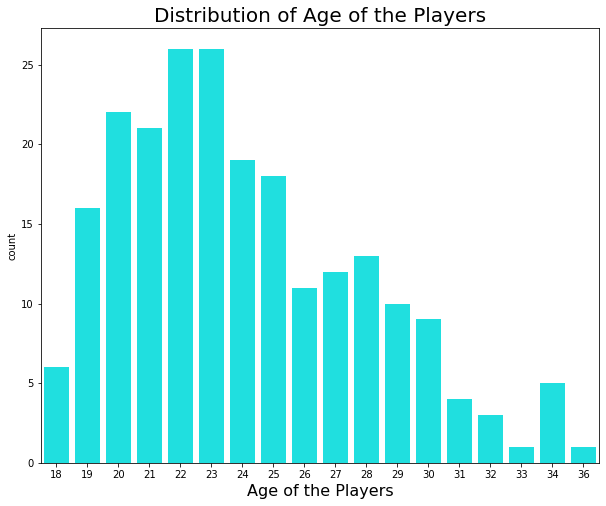

In [42]:
x = teamindiaall['age']
plt.figure(figsize=(10,8))
ax = sns.countplot(x,color='#00ffff')
ax.set_xlabel(xlabel = 'Age of the Players', fontsize = 16)
ax.set_title(label = 'Distribution of Age of the Players', fontsize = 20)
plt.show()

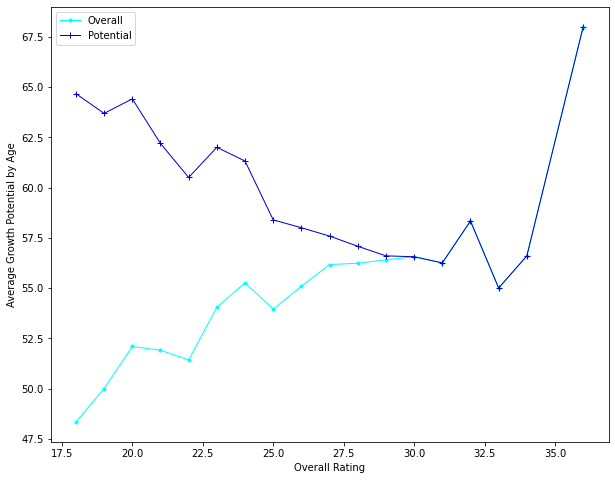

In [43]:
overall = pd.DataFrame(teamindiaall.groupby(["age"])['overall'].mean())
potential = pd.DataFrame(teamindiaall.groupby(["age"])['potential'].mean())

merged = pd.merge(overall, potential, on='age', how='inner')
merged['age']= merged.index

fig, ax = plt.subplots(figsize=(10,8))

merged.reset_index(drop = True, inplace = True)

plt.plot('age', 'overall', data=merged, marker='.', color='#00ffff', lw=1, label ="Overall" )
plt.plot('age', 'potential', data=merged, marker='+', color='#0000cc', lw=1, label = "Potential")
plt.xlabel('Overall Rating')
plt.ylabel('Average Growth Potential by Age')
plt.legend();

In [51]:
#Indian players with highest potential 
teamindiaall[['long_name','age','club_name','potential']].sort_values(by='potential',ascending=False).head(16)

,long_name,age,club_name,potential
13892,Anirudh Thapa,23,Chennaiyin FC,73
16197,Lalengmawia Ralte,20,Mumbai City FC,72
17126,Dheeraj Singh Moirangthem,20,FC Goa,71
18657,Muhammed Nemil,19,FC Goa,71
17564,Jeakson Singh,20,Kerala Blasters FC,70
18226,Sumit Rathi,19,ATK Mohun Bagan FC,70
18684,Komal Thatal,20,Jamshedpur FC,70
19137,Vishal Yadav,19,Jamshedpur FC,68
17272,Akash Mishra,19,Hyderabad FC,68
17179,Liston Colaco,22,ATK Mohun Bagan FC,68


In [50]:
#Indian players with highest ratings 
teamindiaall[['long_name','age','overall','club_name']].sort_values(by='overall',ascending=False).head(16)

,long_name,age,overall,club_name
6509,Sunil Chhetri,36,68,Bengaluru FC
11417,Gurpreet Singh Sandhu,29,64,Bengaluru FC
12312,Arindam Bhattacharya,31,63,SC East Bengal FC
12515,Amrinder Singh,28,63,ATK Mohun Bagan FC
12563,Pritam Kotal,27,63,ATK Mohun Bagan FC
13656,Rowllin Borges,29,62,Mumbai City FC
13892,Anirudh Thapa,23,62,Chennaiyin FC
14770,Seriton Fernandes,28,61,FC Goa
14771,Brandon Fernandes,26,61,FC Goa
14708,Subhasish Bose,25,61,ATK Mohun Bagan FC
